# On-Time or Off Track? A Data-Driven Look at U.S. Airline Reliability


**PROBLEM STATEMENT:**

This dataset aims to analyze flight arrival performance across U.S. airports from August 2013 to August 2023, focusing on delays, cancellations, and diversions categorized by carriers. The goal is to identify trends, root causes of delays (e.g., carrier, weather, NAS), and performance variations across airlines and airports. Insights from this analysis can help improve operational efficiency, reduce disruptions, and enhance the overall reliability of air travel.


**BUSINESS CONTEXT:**

Flight delays and cancellations significantly impact airline revenue, customer satisfaction, and operational efficiency. For airlines, prolonged delays can lead to increased operational costs, missed connections, and reputational damage. For airports and regulatory bodies, understanding delay patterns is vital for capacity planning and infrastructure improvements.

This dataset offers airlines, airport operators, and aviation regulators a valuable opportunity to analyze historical performance, benchmark carriers, and uncover the root causes of delays. By leveraging these insights, stakeholders can optimize resource allocation, enhance scheduling accuracy, and develop proactive strategies to minimize disruptions. Ultimately, such data-driven decision-making supports improved service reliability, cost savings, and a better passenger experience in the highly competitive aviation industry.




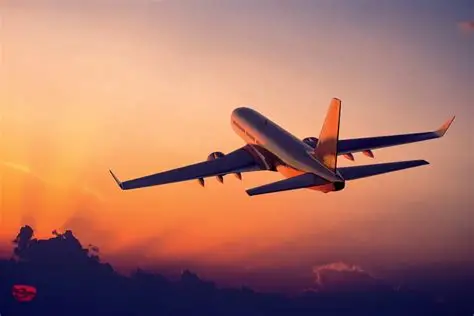


**DATA STORAGE:**


The dataset is structured as a tabular format with rows representing unique combinations of year, month, carrier, and airport. Each row contains information on various metrics, including flight counts, delay counts, cancellation and diversion counts, and delay breakdowns by different factors. The columns provide specific details such as carrier codes and names, airport codes and names, and counts of delays attributed to carrier, weather, NAS, security, and late aircraft arrivals. The structured format ensures that users can easily query, analyze, and visualize the data to derive meaningful insights.

year: The year of the data.

month: The month of the data.

carrier: Carrier code.

carrier_name: Carrier name.

airport: Airport code.

airport_name: Airport name.

arr_flights: Number of arriving flights.

arr_del15: Number of flights delayed by 15 minutes or more.

carrier_ct: Carrier count (delay due to the carrier).

weather_ct: Weather count (delay due to weather).

nas_ct: NAS (National Airspace System) count (delay due to the NAS).

security_ct: Security count (delay due to security).

late_aircraft_ct: Late aircraft count (delay due to late aircraft arrival).

arr_cancelled: Number of flights canceled.

arr_diverted: Number of flights diverted.

arr_delay: Total arrival delay.

carrier_delay: Delay attributed to the carrier.

weather_delay: Delay attributed to weather.

nas_delay: Delay attributed to the NAS.

security_delay: Delay attributed to security.

late_aircraft_delay: Delay attributed to late aircraft arrival.

IMPORITNG NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Airline_Delay_Cause.csv to Airline_Delay_Cause.csv


In [ ]:
# prompt: WHAT WOULD BE THE PROBLEM STATEMENT FOR THIS DATASET

print('The problem statement would be to analyze flight delays. Based on the imports and the title in the comments, it seems the user intends to load flight data, perform exploratory data analysis (using pandas, numpy, seaborn, matplotlib), preprocess features (using MinMaxScaler, StandardScaler), and likely build a model to predict or understand flight delays.')


LOADING THE DATASET

In [ ]:
df = pd.read_csv("Airline_Delay_Cause.csv")

EXPLORATION OF THE DATASET

In [ ]:
df.shape

(171666, 21)

In [ ]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

In [ ]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64


In [ ]:
# Check data types and non-null counts
print(df.info())

# Check for missing values
missing = df.isnull().sum()
print(missing[missing > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171666 entries, 0 to 171665
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 171666 non-null  int64  
 1   month                171666 non-null  int64  
 2   carrier              171666 non-null  object 
 3   carrier_name         171666 non-null  object 
 4   airport              171666 non-null  object 
 5   airport_name         171666 non-null  object 
 6   arr_flights          171426 non-null  float64
 7   arr_del15            171223 non-null  float64
 8   carrier_ct           171426 non-null  float64
 9   weather_ct           171426 non-null  float64
 10  nas_ct               171426 non-null  float64
 11  security_ct          171426 non-null  float64
 12  late_aircraft_ct     171426 non-null  float64
 13  arr_cancelled        171426 non-null  float64
 14  arr_diverted         171426 non-null  float64
 15  arr_delay        

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [ ]:
# Option 1: Drop rows with too many missing values
df = df.dropna(thresh=15)  # Keep rows with at least 15 non-null values

# Option 2: Fill missing numeric values with 0 (delays/cancellations/diversions)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Check again
print(df.isnull().sum())


year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64


In [ ]:
# Drop duplicates if any
df = df.drop_duplicates()


In [ ]:
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['carrier'] = df['carrier'].astype(str)
df['airport'] = df['airport'].astype(str)


In [ ]:
print(df.shape)
print(df.describe())
print(df.info())


(171426, 21)
                year          month    arr_flights      arr_del15  \
count  171426.000000  171426.000000  171426.000000  171426.000000   
mean     2018.551194       6.492860     362.528467      66.355716   
std         2.890212       3.440977     992.894662     179.448903   
min      2013.000000       1.000000       1.000000       0.000000   
25%      2016.000000       4.000000      50.000000       6.000000   
50%      2019.000000       7.000000     100.000000      17.000000   
75%      2021.000000       9.000000     250.000000      47.000000   
max      2023.000000      12.000000   21977.000000    4176.000000   

          carrier_ct     weather_ct         nas_ct    security_ct  \
count  171426.000000  171426.000000  171426.000000  171426.000000   
mean       20.796615       2.250347      19.381147       0.157096   
std        50.315176       7.314252      61.675244       0.717405   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.160000

In [ ]:
df.to_csv("cleaned_flight_delay_data.csv", index=False)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant numerical columns
delay_cols = [
    'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'
]


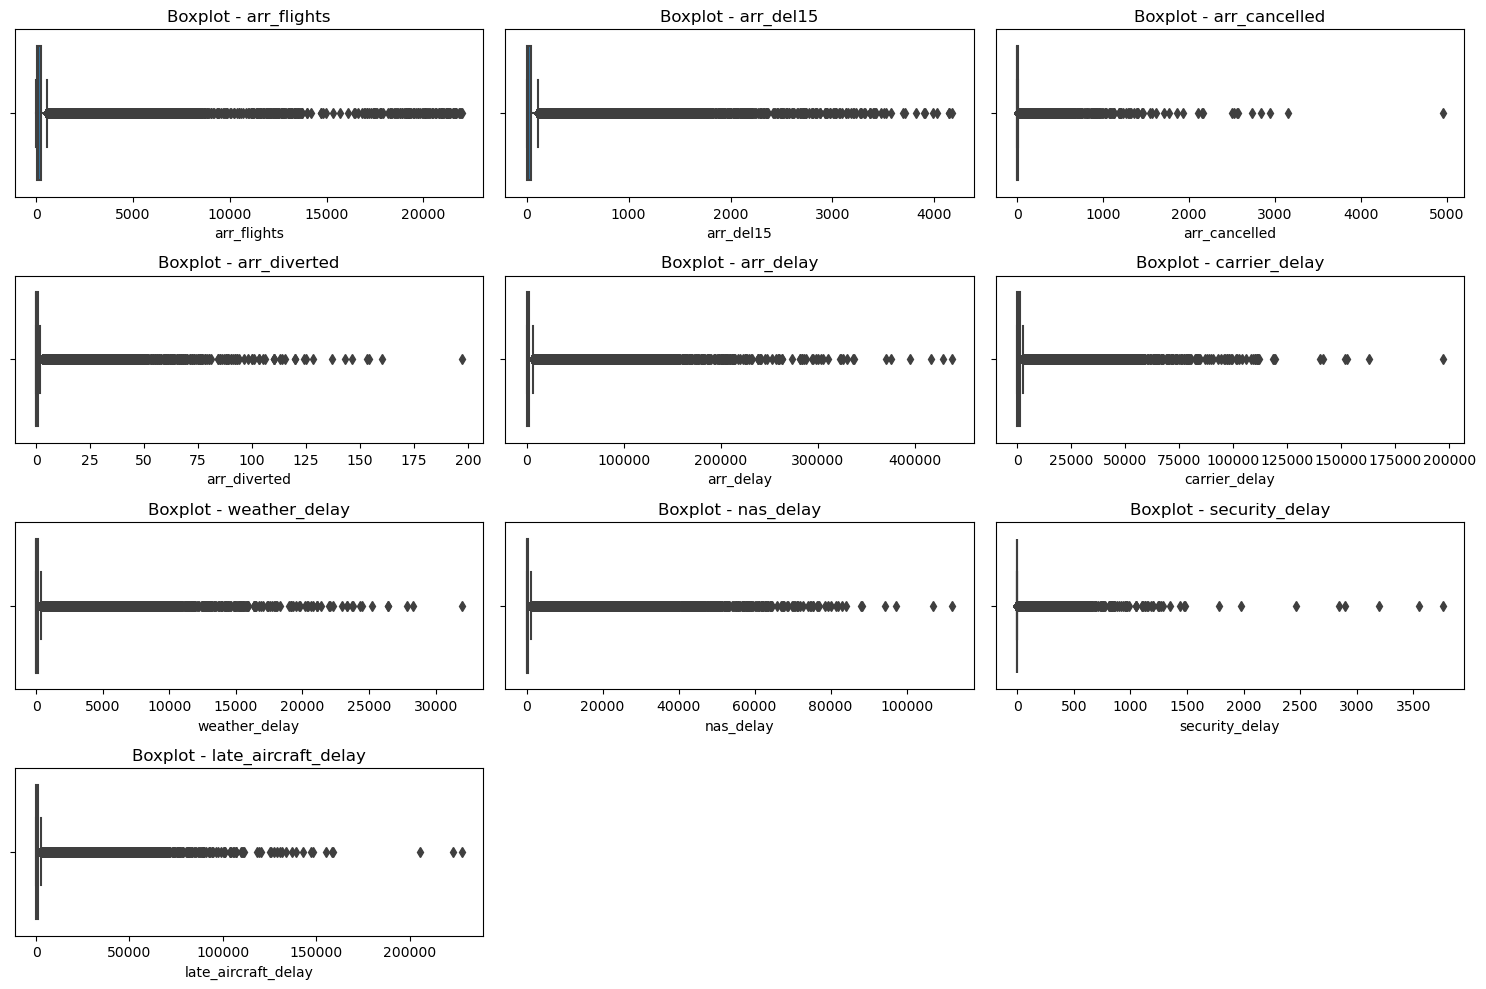

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(delay_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()


In [ ]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] < lower) | (data[col] > upper)]

# Count of outliers per column
for col in delay_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


arr_flights: 21642 outliers
arr_del15: 21148 outliers
arr_cancelled: 20554 outliers
arr_diverted: 12154 outliers
arr_delay: 21117 outliers
carrier_delay: 19476 outliers
weather_delay: 22272 outliers
nas_delay: 22406 outliers
security_delay: 21248 outliers
late_aircraft_delay: 21416 outliers


In [ ]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return df

for col in delay_cols:
    df = cap_outliers(df, col)


In [ ]:
for col in delay_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


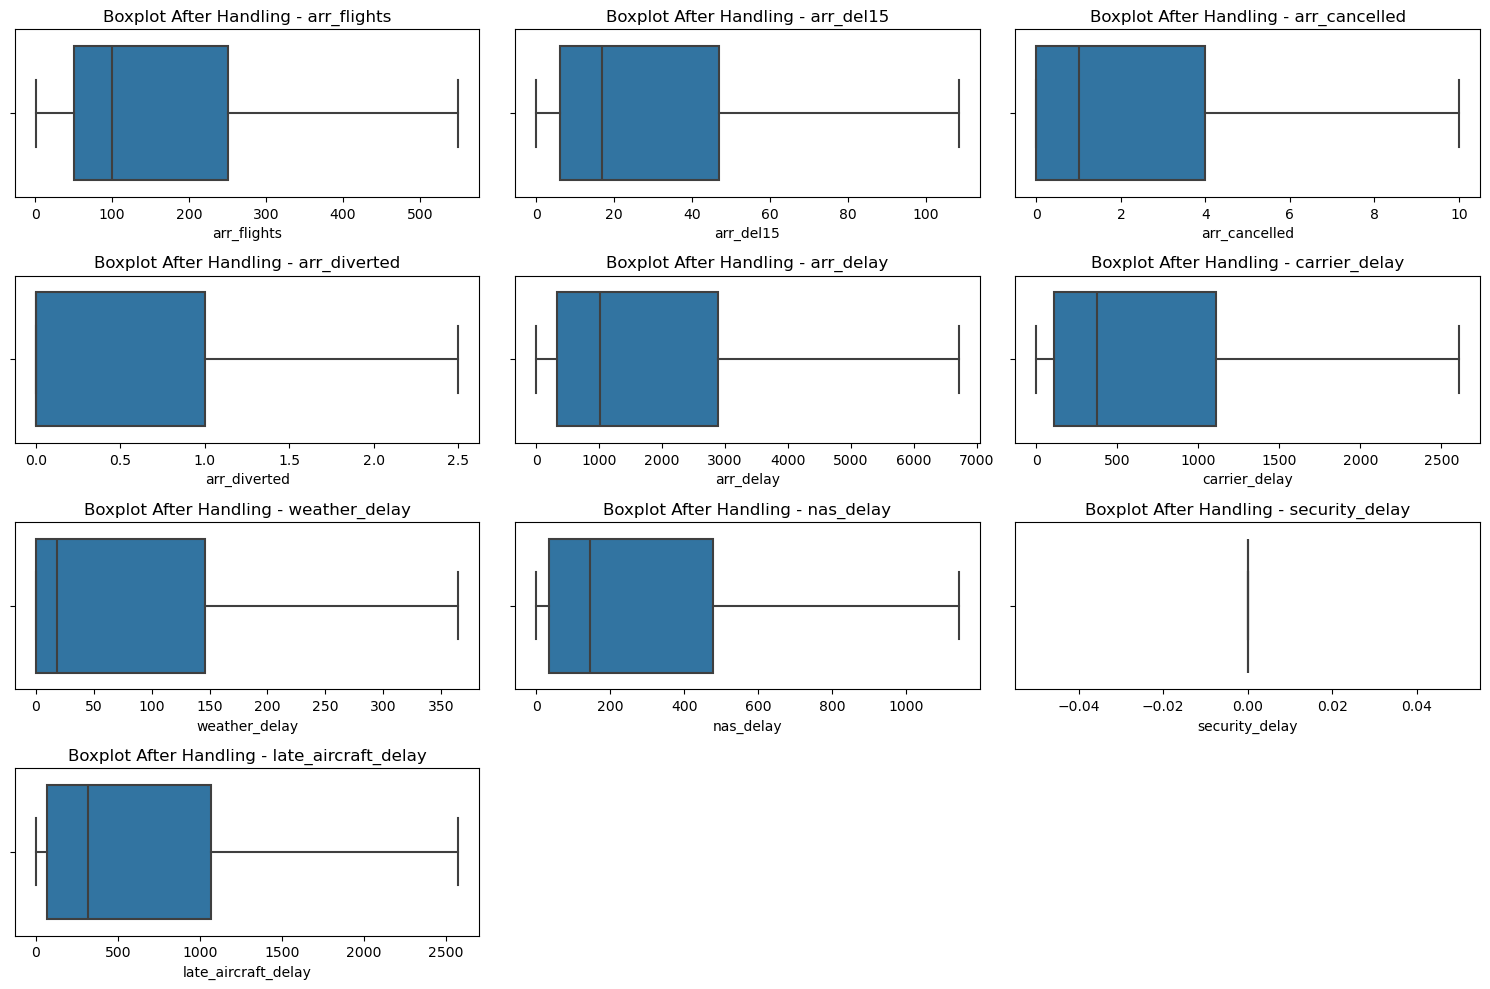

In [ ]:
# Visualize after outlier handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(delay_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot After Handling - {col}')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Features to scale (excluding categorical and ID-like columns)
scale_cols = [
    'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'
]


In [ ]:
# Make a copy to preserve original
df_scaled = df.copy()

# Apply StandardScaler
scaler = StandardScaler()
df_scaled[scale_cols] = scaler.fit_transform(df_scaled[scale_cols])

# Check scaled output
print(df_scaled[scale_cols].describe())



        arr_flights     arr_del15  arr_cancelled  arr_diverted     arr_delay  \
count  1.714260e+05  1.714260e+05   1.714260e+05  1.714260e+05  1.714260e+05   
mean  -8.886654e-17  4.111736e-17  -8.488745e-17 -5.968649e-17  7.626606e-18   
std    1.000003e+00  1.000003e+00   1.000003e+00  1.000003e+00  1.000003e+00   
min   -9.909344e-01 -9.200416e-01  -7.405814e-01 -5.462537e-01 -8.972975e-01   
25%   -7.180433e-01 -7.530526e-01  -7.405814e-01 -5.462537e-01 -7.475159e-01   
50%   -4.395830e-01 -4.469060e-01  -4.561103e-01 -5.462537e-01 -4.421403e-01   
75%    3.957979e-01  3.880392e-01   3.973030e-01  7.390676e-01  3.921656e-01   
max    2.066560e+00  2.099677e+00   2.104130e+00  2.667050e+00  2.101688e+00   

       carrier_delay  weather_delay     nas_delay  security_delay  \
count   1.714260e+05   1.714260e+05  1.714260e+05        171426.0   
mean   -1.691117e-17   6.631832e-18 -2.055868e-17             0.0   
std     1.000003e+00   1.000003e+00  1.000003e+00             0.0   
min

C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

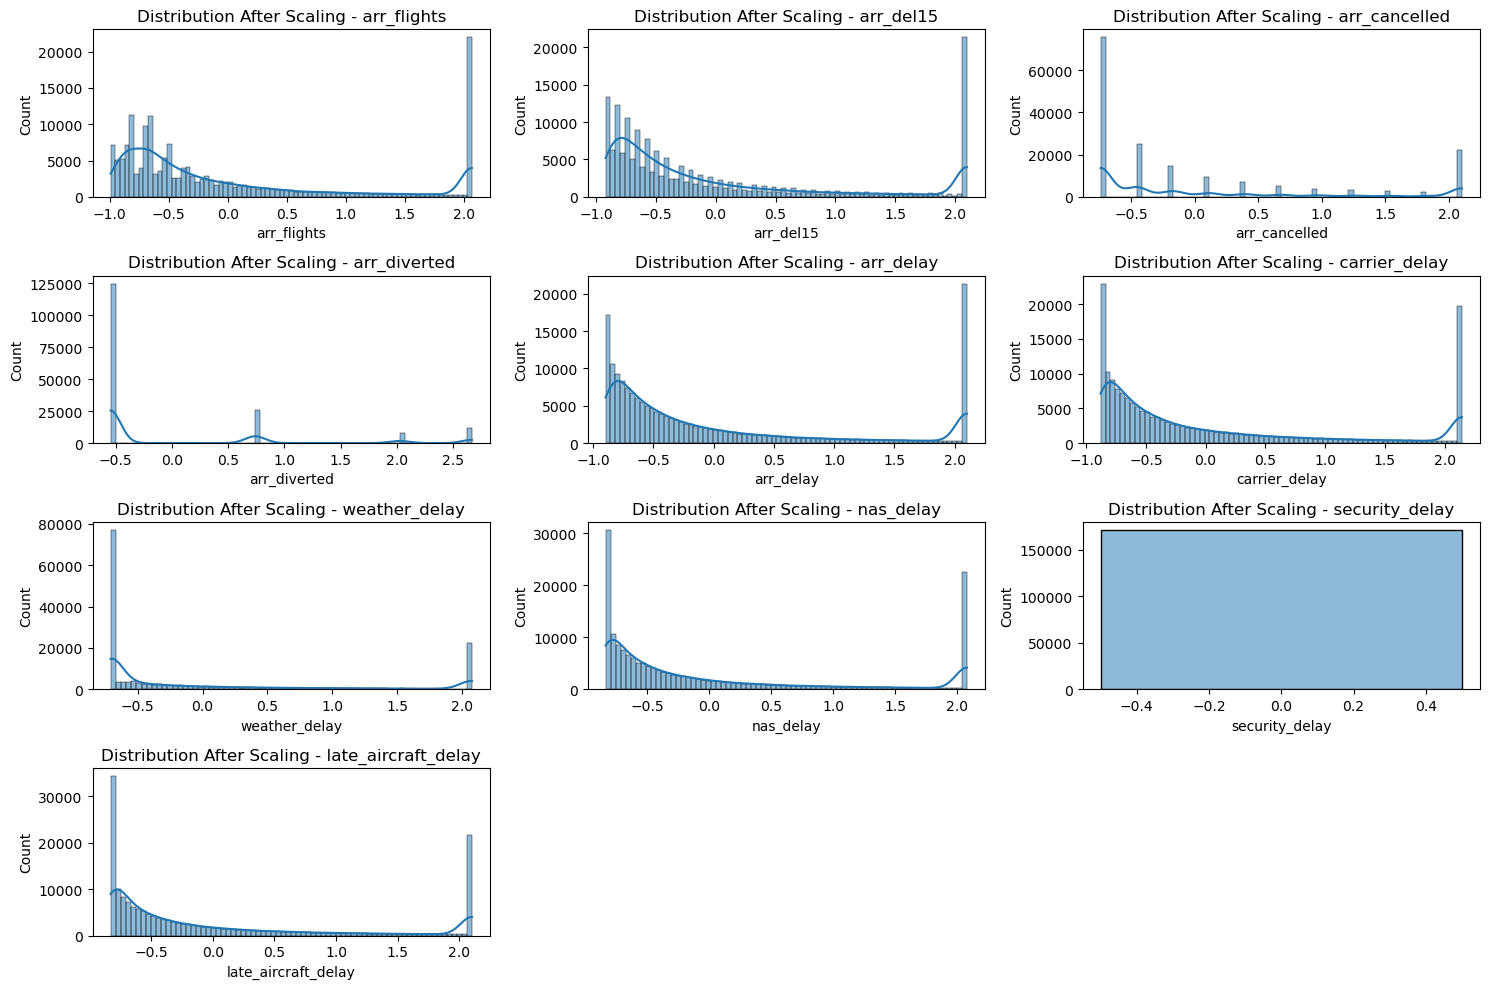

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the scaled distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(scale_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df_scaled[col], kde=True)
    plt.title(f'Distribution After Scaling - {col}')
plt.tight_layout()
plt.show()


#Univariate Analysis

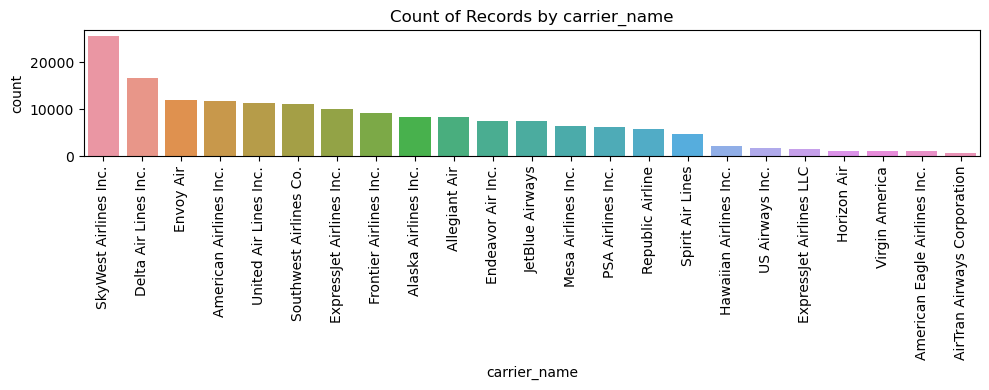

C:\Users\khurshid alam\AppData\Local\Temp\ipykernel_7084\907683196.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


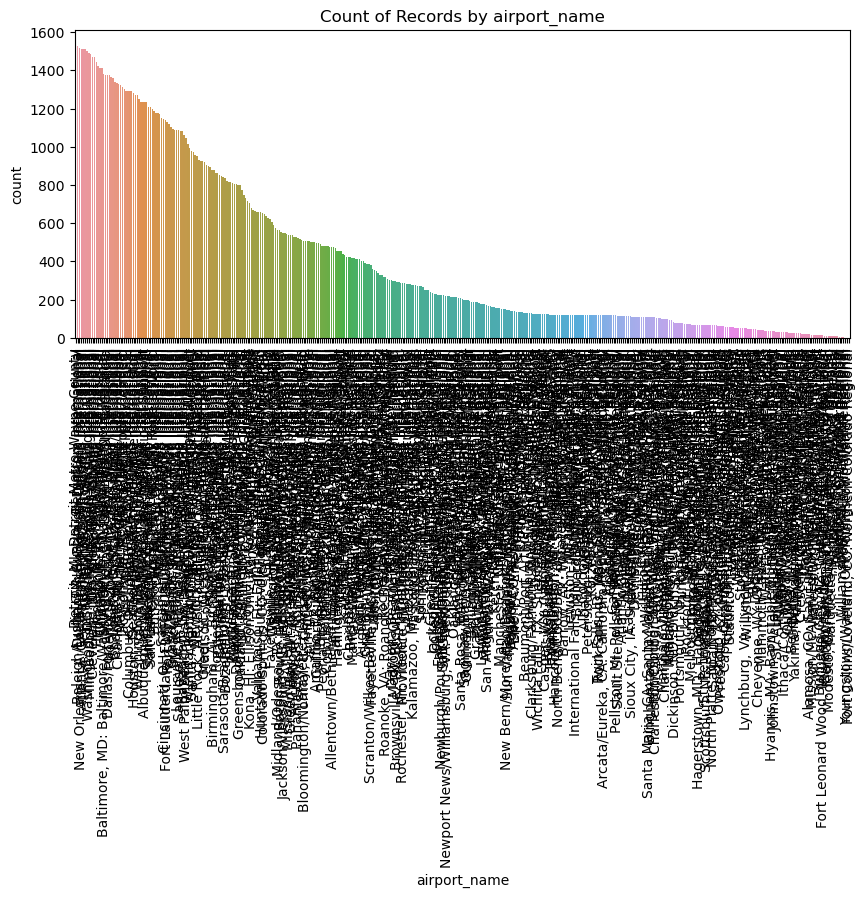

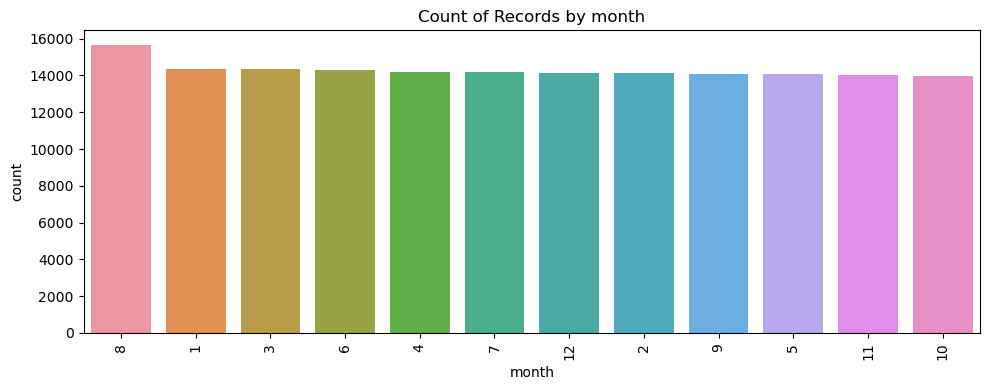

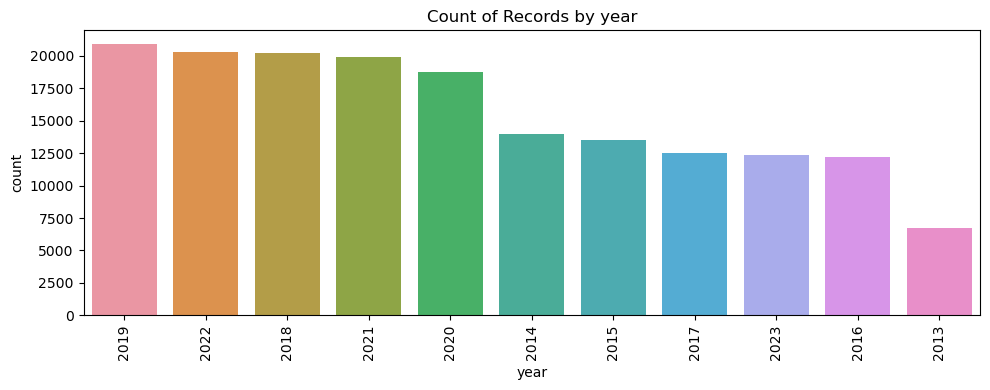

In [ ]:
# Categorical columns
cat_cols = ['carrier_name', 'airport_name', 'month', 'year']

# Plot bar plots for categorical data
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order)
    plt.title(f'Count of Records by {col}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


In [ ]:
print(df_scaled[numeric_cols].describe().T)


                        count          mean        std          min  \
year                 171426.0  2.018551e+03   2.890212  2013.000000   
month                171426.0  6.492860e+00   3.440977     1.000000   
arr_flights          171426.0 -8.886654e-17   1.000003    -0.990934   
arr_del15            171426.0  4.111736e-17   1.000003    -0.920042   
carrier_ct           171426.0  2.079662e+01  50.315176     0.000000   
weather_ct           171426.0  2.250347e+00   7.314252     0.000000   
nas_ct               171426.0  1.938115e+01  61.675244     0.000000   
security_ct          171426.0  1.570963e-01   0.717405     0.000000   
late_aircraft_ct     171426.0  2.377055e+01  72.393477     0.000000   
arr_cancelled        171426.0 -8.488745e-17   1.000003    -0.740581   
arr_diverted         171426.0 -5.968649e-17   1.000003    -0.546254   
arr_delay            171426.0  7.626606e-18   1.000003    -0.897297   
carrier_delay        171426.0 -1.691117e-17   1.000003    -0.879120   
weathe

# Average Arrival Delay by Airline

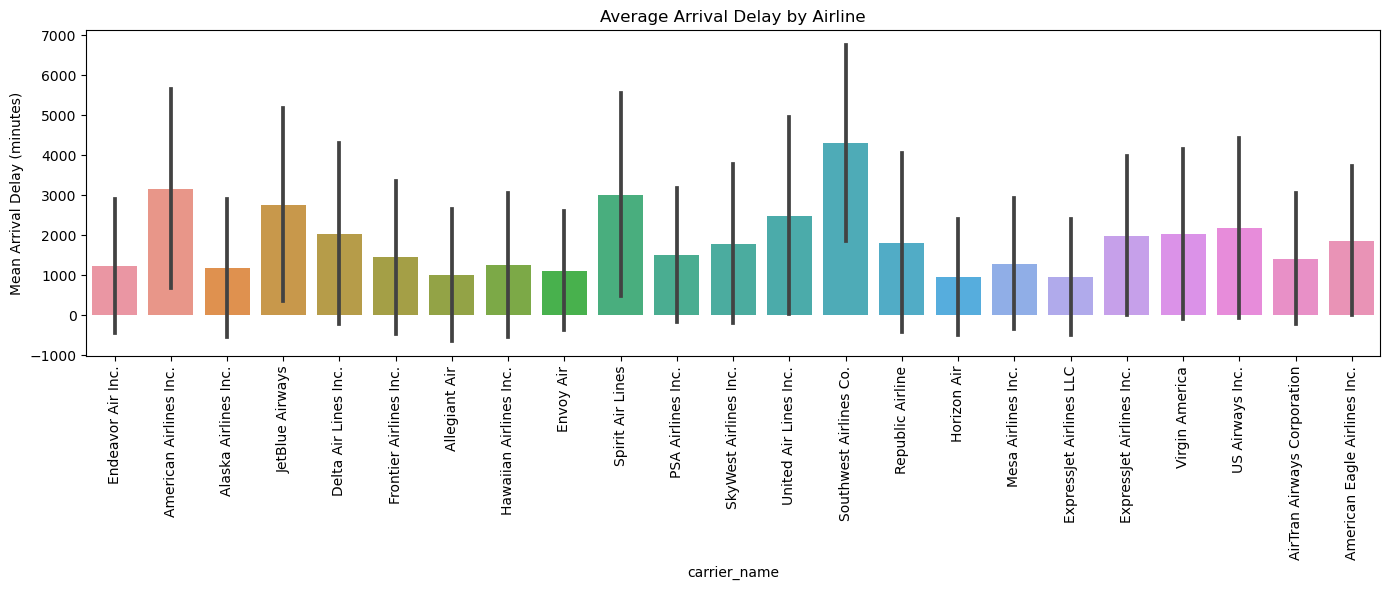

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x='carrier_name', y='arr_delay', estimator='mean', errorbar='sd')
plt.xticks(rotation=90)
plt.title('Average Arrival Delay by Airline')
plt.ylabel('Mean Arrival Delay (minutes)')
plt.tight_layout()
plt.show()


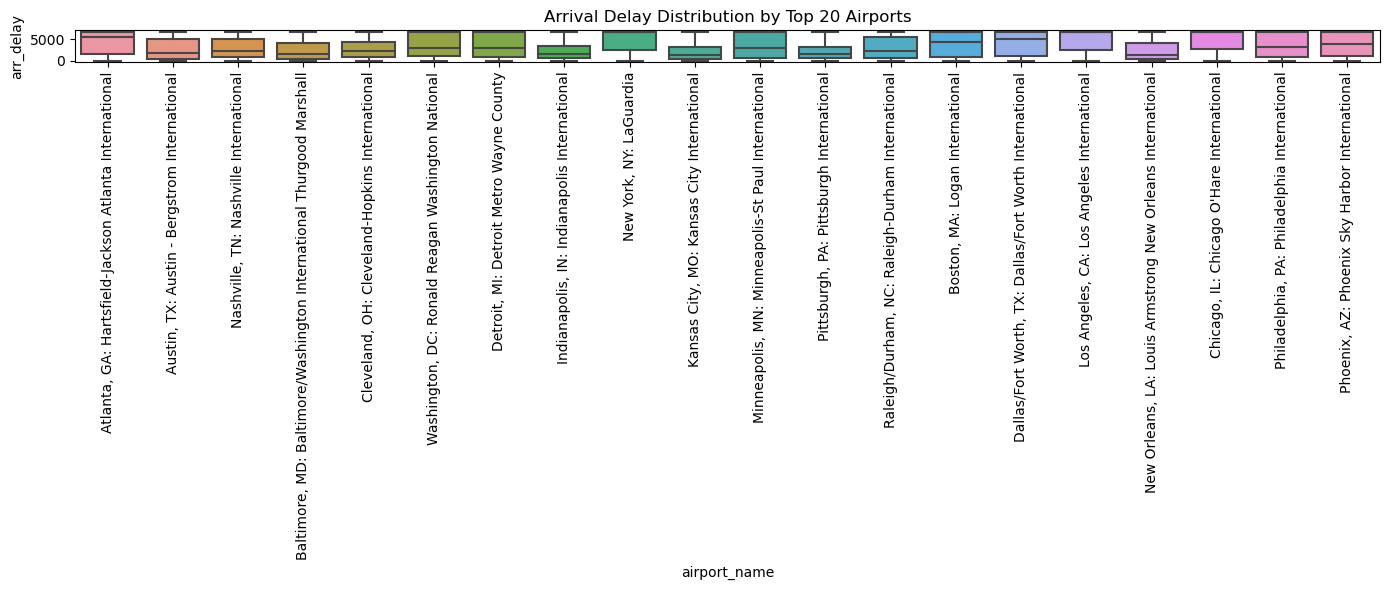

In [ ]:
top_airports = df['airport_name'].value_counts().head(20).index
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[df['airport_name'].isin(top_airports)], x='airport_name', y='arr_delay')
plt.xticks(rotation=90)
plt.title('Arrival Delay Distribution by Top 20 Airports')
plt.tight_layout()
plt.show()


# Average Arrival Delay by Month

In [ ]:
month_delay_mean = df.groupby('month')['arr_delay'].mean()
print(month_delay_mean)


month
1     2022.381087
2     1968.528055
3     1923.446165
4     1833.996197
5     1935.569733
6     2366.356194
7     2462.289186
8     2270.770360
9     1624.212631
10    1734.990821
11    1699.704857
12    2198.986500
Name: arr_delay, dtype: float64


C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


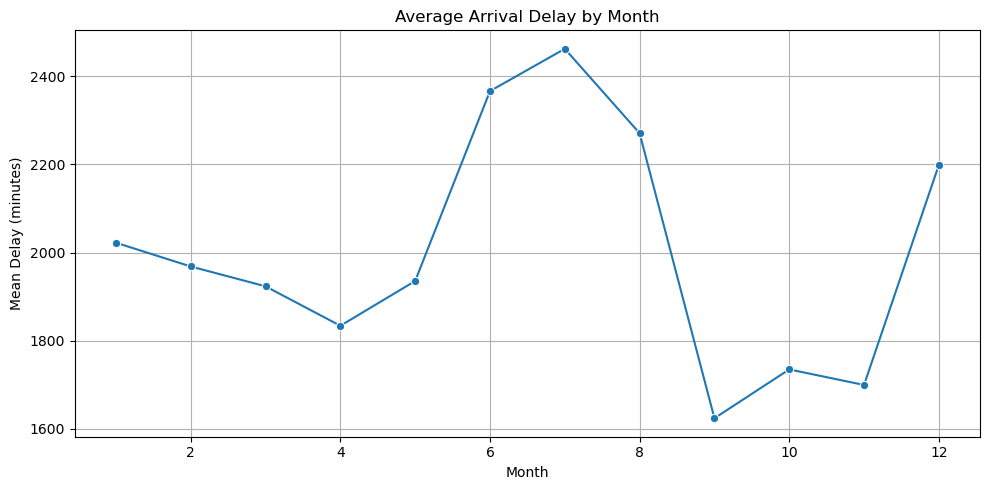

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=month_delay_mean.index, y=month_delay_mean.values, marker='o')
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Mean Delay (minutes)')
plt.grid()
plt.tight_layout()
plt.show()


# Average Delay by Airport (Top 10)

In [ ]:
top_airports = df['airport_name'].value_counts().head(10).index
airport_delay_mean = df[df['airport_name'].isin(top_airports)].groupby('airport_name')['arr_delay'].mean().sort_values(ascending=False)
print(airport_delay_mean)


airport_name
Atlanta, GA: Hartsfield-Jackson Atlanta International         4280.013907
Washington, DC: Ronald Reagan Washington National             3520.483925
Detroit, MI: Detroit Metro Wayne County                       3442.396743
Minneapolis, MN: Minneapolis-St Paul International            3362.368102
Raleigh/Durham, NC: Raleigh-Durham International              2937.640264
Nashville, TN: Nashville International                        2858.785180
Austin, TX: Austin - Bergstrom International                  2650.966972
New Orleans, LA: Louis Armstrong New Orleans International    2384.992404
Pittsburgh, PA: Pittsburgh International                      2211.612989
Kansas City, MO: Kansas City International                    2166.467312
Name: arr_delay, dtype: float64


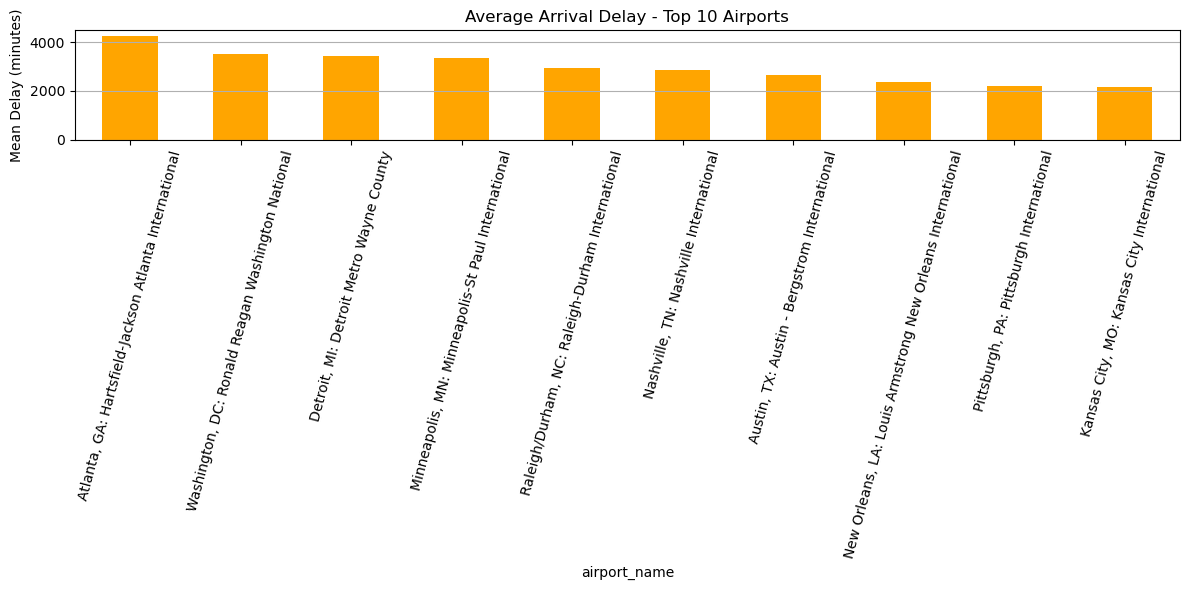

In [ ]:
plt.figure(figsize=(12,6))
airport_delay_mean.plot(kind='bar', color='orange')
plt.title('Average Arrival Delay - Top 10 Airports')
plt.ylabel('Mean Delay (minutes)')
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Delay Correlation Heatmap

In [ ]:
delay_columns = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
correlation = df[delay_columns].corr()
print(correlation)


                     arr_delay  carrier_delay  weather_delay  nas_delay  \
arr_delay             1.000000       0.942441       0.680588   0.875196   
carrier_delay         0.942441       1.000000       0.615437   0.772916   
weather_delay         0.680588       0.615437       1.000000   0.589976   
nas_delay             0.875196       0.772916       0.589976   1.000000   
security_delay             NaN            NaN            NaN        NaN   
late_aircraft_delay   0.943335       0.852166       0.604736   0.796274   

                     security_delay  late_aircraft_delay  
arr_delay                       NaN             0.943335  
carrier_delay                   NaN             0.852166  
weather_delay                   NaN             0.604736  
nas_delay                       NaN             0.796274  
security_delay                  NaN                  NaN  
late_aircraft_delay             NaN             1.000000  


C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


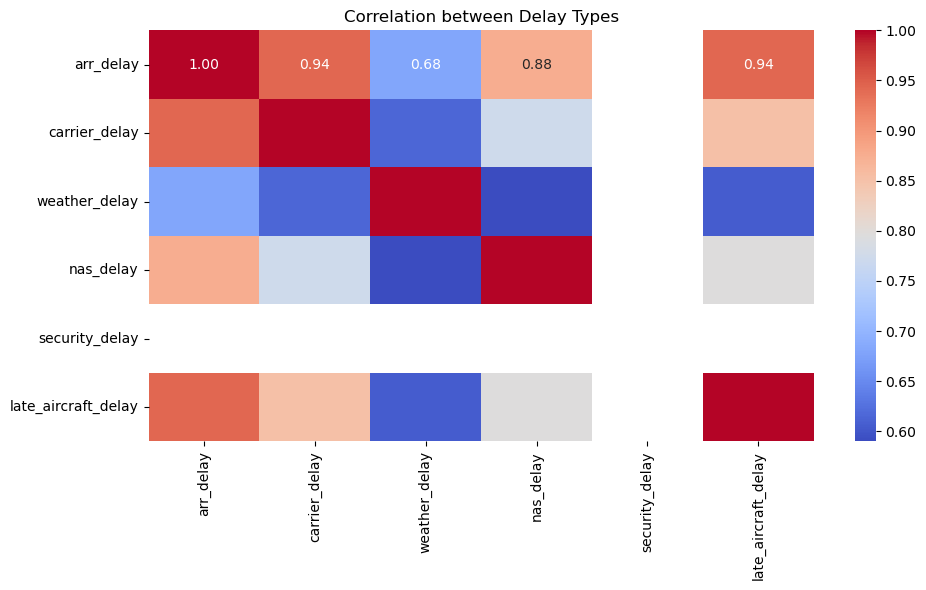

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Delay Types')
plt.tight_layout()
plt.show()


In [ ]:
summary = df.groupby('carrier_name')[['arr_delay', 'carrier_delay', 'late_aircraft_delay']].mean().sort_values(by='arr_delay', ascending=False)
print(summary.head(10))


                                arr_delay  carrier_delay  late_aircraft_delay
carrier_name                                                                 
Southwest Airlines Co.        4299.818751    1633.153119          1763.384013
American Airlines Inc.        3163.414635    1219.467073          1210.925343
Spirit Air Lines              3018.354513     886.315773           918.692103
JetBlue Airways               2758.433792    1118.081038           961.102026
United Air Lines Inc.         2493.409717     856.152160          1018.204748
US Airways Inc.               2187.593384     882.643443           609.799766
Delta Air Lines Inc.          2040.977845     885.429488           576.285466
Virgin America                2029.893204     523.061783           810.363195
ExpressJet Airlines Inc.      1990.728615     819.146731           720.002222
American Eagle Airlines Inc.  1862.624521     503.748084           695.599617


# Multivariate Analysis on Flight Delay Data

C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\khurshid alam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

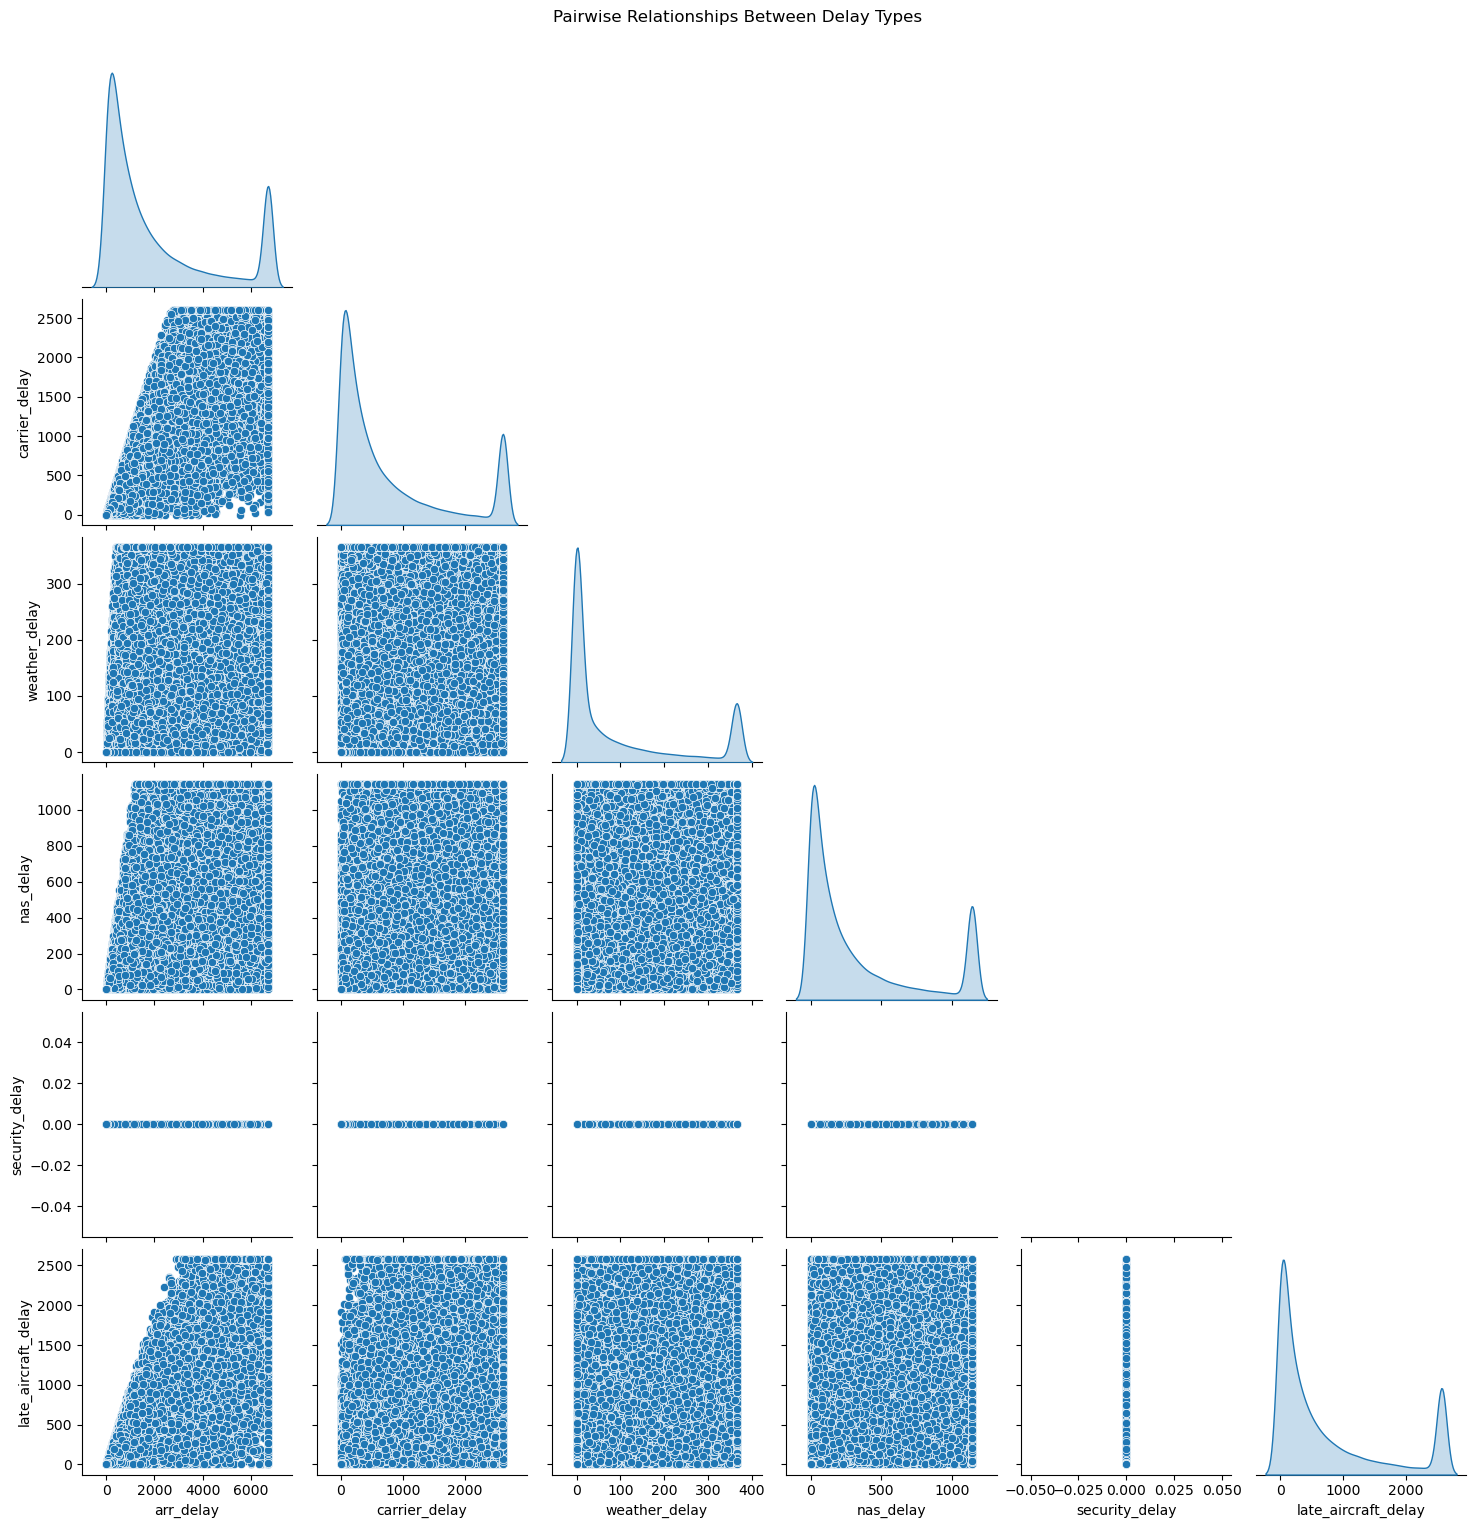

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

delay_cols = [
    'arr_delay', 'carrier_delay', 'weather_delay',
    'nas_delay', 'security_delay', 'late_aircraft_delay'
]

sns.pairplot(df[delay_cols], corner=True, diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Delay Types', y=1.02)
plt.show()


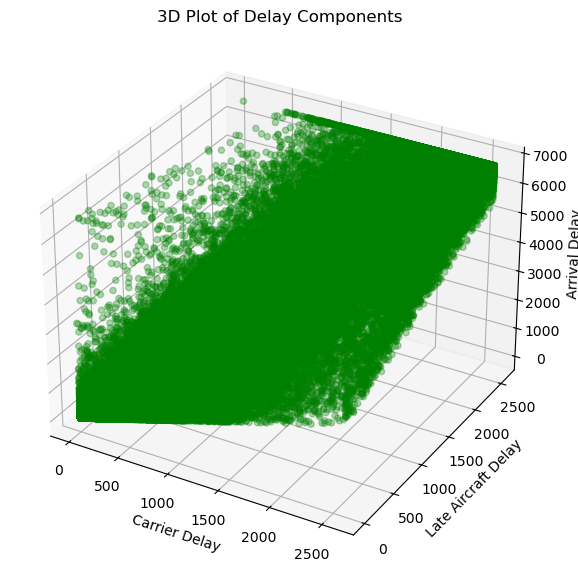

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df['carrier_delay'], df['late_aircraft_delay'], df['arr_delay'],
    c='green', alpha=0.3
)
ax.set_xlabel('Carrier Delay')
ax.set_ylabel('Late Aircraft Delay')
ax.set_zlabel('Arrival Delay')
ax.set_title('3D Plot of Delay Components')
plt.show()


In [ ]:
df['delayed'] = (df['arr_delay'] > 15).astype(int)


# Binary Classification – Predict if Flight is Delayed

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and Target
features = df.drop(columns=['arr_delay', 'delayed', 'carrier', 'carrier_name', 'airport', 'airport_name'])
target = df['delayed']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 1409    12]
 [    0 32865]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1421
           1       1.00      1.00      1.00     32865

    accuracy                           1.00     34286
   macro avg       1.00      1.00      1.00     34286
weighted avg       1.00      1.00      1.00     34286



# Regression Task – Predict Arrival Delay (in minutes)

In [ ]:
# Reuse features, but this time target is continuous
target_reg = df['arr_delay']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(features, target_reg, test_size=0.2, random_state=42)
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)


# Train Reegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_r_scaled, y_train_r)

y_pred_r = reg.predict(X_test_r_scaled)

print("RMSE:", mean_squared_error(y_test_r, y_pred_r, squared=False))
print("R² Score:", r2_score(y_test_r, y_pred_r))


RMSE: 161.06973992330268
R² Score: 0.9948002401173451


C:\Users\khurshid alam\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


 # Model Evaluation
# Classification Task – Predicting if a flight is delayed (>15 mins)

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1421
           1       1.00      1.00      1.00     32865

    accuracy                           1.00     34286
   macro avg       1.00      1.00      1.00     34286
weighted avg       1.00      1.00      1.00     34286



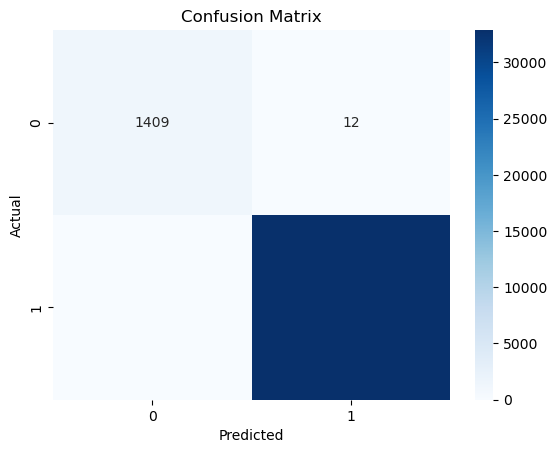

ROC AUC Score: 1.0000


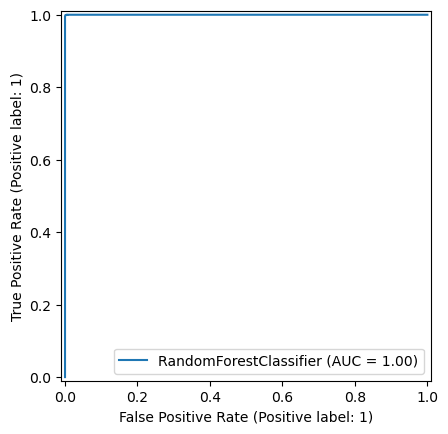

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Already predicted y_pred
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC Score and Curve
y_proba = clf.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

RocCurveDisplay.from_estimator(clf, X_test_scaled, y_test)
plt.show()


 # Regression Task – Predicting actual arrival delay in minutes

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_r, y_pred_r)
mse = mean_squared_error(y_test_r, y_pred_r)
rmse = mean_squared_error(y_test_r, y_pred_r, squared=False)
r2 = r2_score(y_test_r, y_pred_r)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


MAE: 53.46
MSE: 25943.46
RMSE: 161.07
R² Score: 0.9948


C:\Users\khurshid alam\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


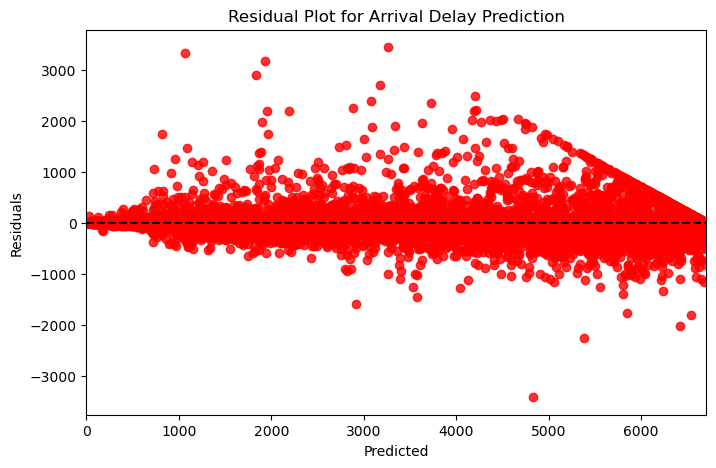

In [ ]:
plt.figure(figsize=(8,5))
sns.residplot(x=y_pred_r, y=y_test_r - y_pred_r, lowess=True, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot for Arrival Delay Prediction")
plt.axhline(0, color='black', linestyle='--')
plt.show()


# Classification Model Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_clf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_clf,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_clf.fit(X_train_scaled, y_train)

print("Best parameters:", grid_clf.best_params_)
print("Best F1 Score:", grid_clf.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.9998060942754404


 # Regression Model Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid_reg = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_reg = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_reg,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_reg.fit(X_train_r_scaled, y_train_r)

print("Best parameters:", grid_reg.best_params_)
print("Best RMSE:", (-grid_reg.best_score_)**0.5)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [ ]:
import joblib

joblib.dump(grid_clf.best_estimator_, 'flight_delay_classifier.pkl')
joblib.dump(grid_reg.best_estimator_, 'flight_delay_regressor.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save the scaler used during training
